In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from io import BytesIO
import pandas_datareader.data as dat_aq
from datetime import datetime, timedelta

import rec_mod as rm
#recession data for comparison
esprec = rm.rec_periods('ESPRECD')
esprec = esprec.astype(int)

85
85


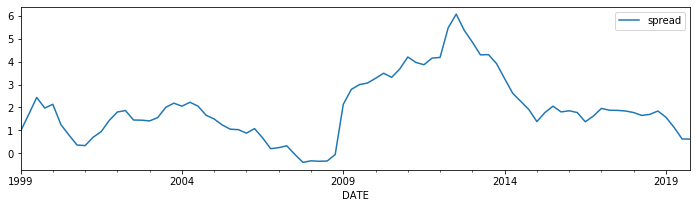

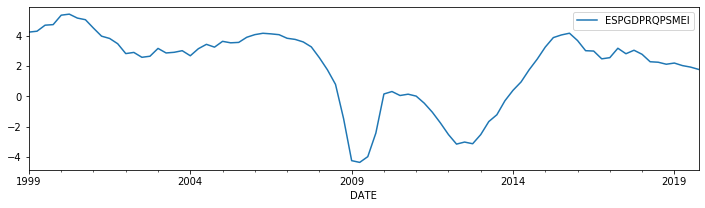

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:            ESPGDPRQPSMEI   No. Observations:                   81
Model:             MarkovAutoregression   Log Likelihood                 -52.315
Date:                  Tue, 28 Apr 2020   AIC                            124.631
Time:                          23:19:56   BIC                            148.575
Sample:                      01-01-1999   HQIC                           134.238
                           - 10-01-2019                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9025      0.924      2.059      0.039       0.092       3.713
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3966      0.922      1.514      0.130      -0.411       3.204
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1435      0.028      5.166      0.000       0.089       0.198
ar.L1          1.9247      0.135     14.225      0.000       1.659       2.190
ar.L2         -1.2660      0.249     -5.084      0.000      -1.754      -0.778
ar.L3          0.2950      0.131      2.244      0.025       0.037       0.553
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0   145.0580    243.325      0.596      0.551    -331.850     621.966
p[1->0].tvtp0    -0.7955      1.884     -0.422      0.673      -4.489       2.898
p[0->0].tvtp1   -96.6496    163.749     -0.590      0.555    -417.592     224.293
p[1->0].tvtp1    -0.3251      0.842     -0.386      0.699      -1.974       1.324
=================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [22]:
esp_gdp_chg = rm.pull_data('ESPGDPRQPSMEI', 'fred', datetime(1998,10,1), datetime(2019,10,1), frequency='QS')
esp3m = rm.pull_data('IR3TIB01ESM156N', 'fred', datetime(1998,10,1), datetime(2019,10,1), frequency='QS')
esp10y = rm.pull_data('IRLTLT01ESM156N', 'fred', datetime(1998,10,1), datetime(2019,10,1), frequency='QS')
esp_spread = pd.DataFrame(esp10y.iloc[:,0] - esp3m.iloc[:,0], columns = ['spread'])
print(len(esp_gdp_chg))
print(len(esp_spread))

result, model = rm.SOP_Phase_1(esp_gdp_chg, 'Markov_Filardo', 2, 3, exog = esp_spread)
result.summary()

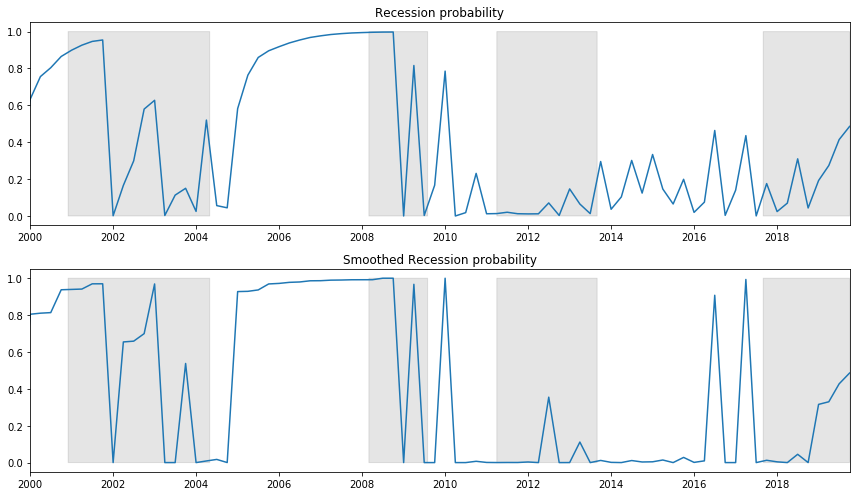

0.6617620112270809
precision =  1.5111172642650443
0.6827983866703218
smooth_precision =  1.4645611640597416


In [24]:
rm.rec_prob_graph(result, esprec, datetime(2000,1,1), datetime(2019,10,1), invert = False)

In [43]:
print(sarec[result.filtered_marginal_probabilities[0].index[0]:result.filtered_marginal_probabilities[0].index[-1]].resample('QS').mean())

            ZAFRECD
DATE               
1991-01-01      1.0
1991-04-01      1.0
1991-07-01      1.0
1991-10-01      1.0
1992-01-01      1.0
...             ...
2018-10-01      1.0
2019-01-01      1.0
2019-04-01      1.0
2019-07-01      1.0
2019-10-01      1.0

[116 rows x 1 columns]
